In [3]:
# import package
import shap
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import os
# load data
os.chdir('C:/Users/sofia/OneDrive/Documents/Downloads')
train_data = pd.read_csv('./train.csv', index_col=0)
test_data = pd.read_csv('./test.csv', index_col=0)
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
def data_preprocessing(df):
    df = df.drop(columns=['Name', 'Ticket', 'Cabin'])
    
    # fill na
    df[['Age']] = df[['Age']].fillna(value=df[['Age']].mean())
    df[['Embarked']] = df[['Embarked']].fillna(value=df['Embarked'].value_counts().idxmax())
    df[['Fare']] = df[['Fare']].fillna(value=df[['Fare']].mean())
    
    # categorical features into numeric
    df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    
    # one-hot encoding
    embarked_one_hot = pd.get_dummies(df['Embarked'], prefix='Embarked')
    df = df.drop('Embarked', axis=1)
    df = df.join(embarked_one_hot)
    
    return df
# train data processing
train_data = data_preprocessing(train_data)
train_data.isnull().sum()
# create data for training
x_train = train_data.drop(['Survived'], axis=1).values
# Check test data
test_data.isnull().sum()
# scale
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
# prepare y_train
y_train = train_data['Survived'].values
test_data = data_preprocessing(test_data)
x_test = test_data.values.astype(float)
# scaling
x_test = scale.transform(x_test)
# Check test data
test_data.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [13]:
# build mlp
model = Sequential()
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))
# compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# fit model
history=model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
14/14 [==============================] - 2s 7ms/step - loss: 0.6812 - accuracy: 0.5701
Epoch 2/10
14/14 [==============================] - 0s 6ms/step - loss: 0.6370 - accuracy: 0.6296
Epoch 3/10
14/14 [==============================] - 0s 6ms/step - loss: 0.6002 - accuracy: 0.6465
Epoch 4/10
14/14 [==============================] - 0s 6ms/step - loss: 0.5683 - accuracy: 0.6981
Epoch 5/10
14/14 [==============================] - 0s 6ms/step - loss: 0.5569 - accuracy: 0.7250
Epoch 6/10
14/14 [==============================] - 0s 6ms/step - loss: 0.5278 - accuracy: 0.7441
Epoch 7/10
14/14 [==============================] - 0s 6ms/step - loss: 0.5321 - accuracy: 0.7284
Epoch 8/10
14/14 [==============================] - 0s 6ms/step - loss: 0.5115 - accuracy: 0.7621
Epoch 9/10
14/14 [==============================] - 0s 8ms/step - loss: 0.5175 - accuracy: 0.7744
Epoch 10/10
14/14 [==============================] - 0s 8ms/step - loss: 0.4868 - accuracy: 0.7980


In [14]:
# compute SHAP values
explainer = shap.DeepExplainer(model, x_train)
shap_values = explainer.shap_values(x_test)

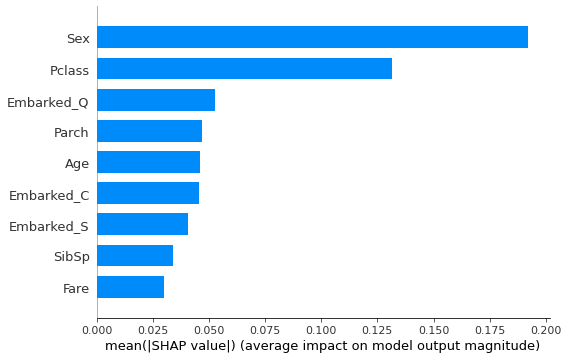

In [6]:
shap.summary_plot(shap_values[0], plot_type = 'bar', feature_names = test_data.columns)